In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

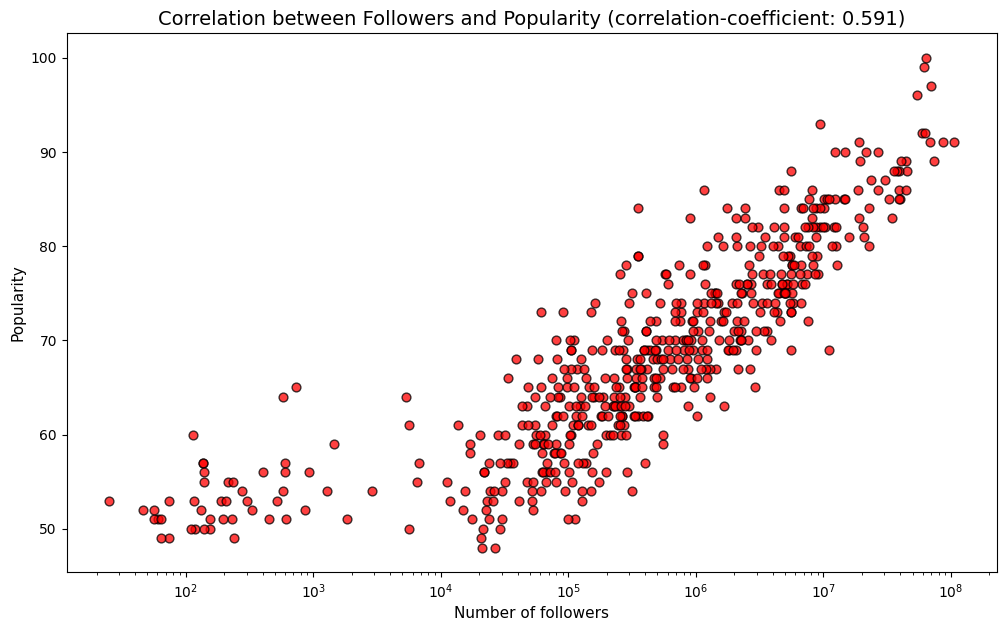

In [2]:
df = pd.read_csv("track_spotify_data.csv")
unique_artists = df['artist_name'].unique().tolist()

artists_followers_popularity = {}
for artist in unique_artists:
    rows_specific_artist = df.loc[df['artist_name'] == artist]
    
    unique_followers = rows_specific_artist['artist_followers'].unique().tolist()
    all_same_followers = all(followers == unique_followers[0] for followers in unique_followers)
    if not all_same_followers:
        print(f"Contradicting follower counts with artist {artist}")
    
    unique_popularity = rows_specific_artist['artist_popularity'].unique().tolist()
    all_same_popularity = all(followers == unique_followers[0] for followers in unique_followers)
    if not all_same_popularity:
        print(f"Contradicting popularity counts with artist {artist}")
        
    followers_popularity_tuple = (unique_followers[0], unique_popularity[0])
    artists_followers_popularity[artist] = followers_popularity_tuple

x = []
y = []

for artist in artists_followers_popularity:
    x.append(artists_followers_popularity[artist][0])
    y.append(artists_followers_popularity[artist][1])

sum_xy = 0
sum_x = 0
sum_y = 0
sum_xsquared = 0
sum_ysquared = 0
counter = 0
for value_x, value_y in zip(x, y):
    counter += 1
    sum_x += value_x
    sum_y += value_y
    sum_xsquared += value_x ** 2
    sum_ysquared += value_y ** 2
    sum_xy += value_x * value_y
        
r = (counter*sum_xy-sum_x*sum_y)/(((counter*sum_xsquared-sum_x**2)*(counter*sum_ysquared-sum_y**2))**0.5)
r = round(r, 3)

figure, axis = plt.subplots(figsize=(12, 7))
plt.subplot()
plt.scatter(x, y, s=40, c='red', edgecolor='black', linewidth=1, alpha=0.75)
plt.title(f"Correlation between Followers and Popularity (correlation-coefficient: {r})", fontsize = 14)
axis.set_xlabel("Number of followers", fontsize = 11)
axis.set_ylabel("Popularity", fontsize = 11)
plt.xscale('log')
plt.show()

R-squared: 0.05788458747111003
MAE: 4.586142499999999


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


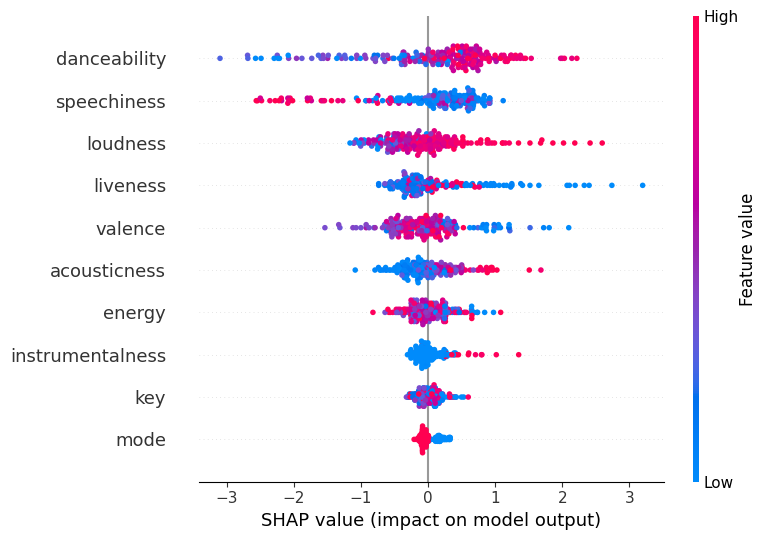

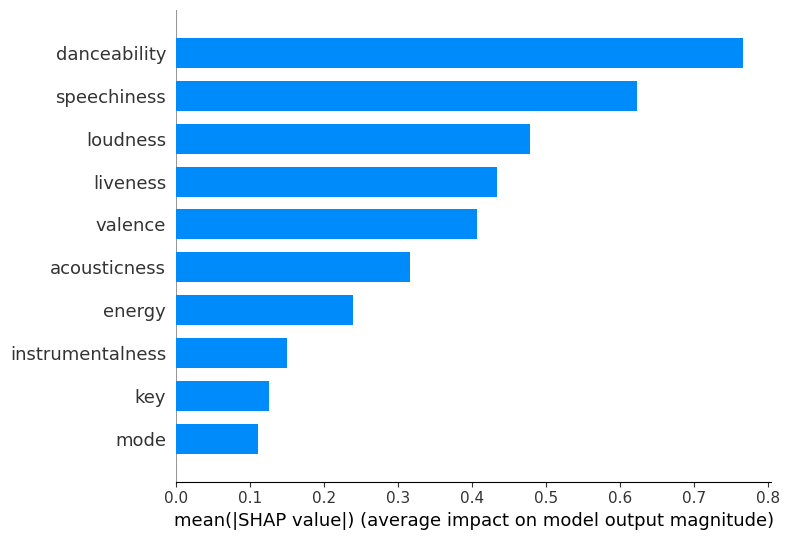

In [3]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
            "liveness", "valence", "track_popularity"]

df_features = pd.read_csv('feature_spotify_data.csv')

df_combined = df.merge(df_features, left_on="track_id", right_on="id", how="inner")
all_columns = list(df_combined)
unnecessary_columns = [i for i in all_columns if i not in features]
df_clean = df_combined.drop(unnecessary_columns, axis=1)

x2 = df_clean.drop('track_popularity', axis=1)
y2 = df_clean['track_popularity']
# -----------
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# compute R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

explainer = shap.Explainer(rf_model)
#shap_values = explainer(X_test)

shap_values = explainer.shap_values(X_test)
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

**Acousticness**: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.

**Liveness**: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Speechiness**: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.

**Instrumentalness:** A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

**Energy**: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.

**Loudness**: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.

**Danceability**: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.

**Valence**: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Key**: A measure from 0 to 11 that indicates the key of a track.

**Mode**: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor)

Source: https://rpubs.com/kdrdatascience/862303#:~:text=Speechiness%3A%20A%20measure%20from%200.0,1.0%20the%20value%20will%20be

In [7]:
df_sorted = df_combined.sort_values('track_popularity', ascending=False)
top_100 = df_sorted.head(100)

medians_per_feature = {}

for feature in features:
    medians_per_feature[feature] = top_100[feature].mean()
    
mode_tempo = df_combined["tempo"].mode()[0]
mode_duration = df_combined["duration_ms"].mode()[0]
mode_key = df_combined["key"].mode()[0]
print(f"Mode tempo: {mode_tempo}, Mode duration: {mode_duration}, Mode key: {mode_key}")

mode_tempo_100 = top_100["tempo"].mode()[0]
mode_duration_100 = top_100["duration_ms"].mode()[0]
mode_key_100 = top_100["key"].mode()[0]
print(f"Mode tempo: {mode_tempo_100}, Mode duration: {mode_duration_100}, Mode key: {mode_key_100}")
    
print(medians_per_feature)

Mode tempo: 90.02, Mode duration: 208000, Mode key: 1
Mode tempo: 90.02, Mode duration: 141806, Mode key: 1
{'danceability': 0.65217, 'energy': 0.6553081000000002, 'key': 5.12, 'loudness': -6.4562, 'mode': 0.65, 'speechiness': 0.08229000000000002, 'acousticness': 0.23746983400000002, 'instrumentalness': 0.0659548448, 'liveness': 0.15259699999999998, 'valence': 0.45625219999999994, 'track_popularity': 83.34}


In [5]:
correlations = df_clean.corr().sort_values('track_popularity', ascending=False, key=abs)
display(correlations)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
track_popularity,1.000000,0.110342,0.038129,0.030016,0.127374,-0.064995,-0.105866,0.017162,-0.031615,-0.036942,0.031728
loudness,0.127374,0.527322,0.557269,-0.003716,1.000000,0.007027,0.049246,-0.414446,-0.666825,-0.080390,0.421105
danceability,0.110342,1.000000,0.185992,0.027254,0.527322,-0.135140,0.256407,-0.284758,-0.413028,-0.173138,0.449912
speechiness,-0.105866,0.256407,0.034579,-0.062601,0.049246,-0.112659,1.000000,-0.129244,-0.096462,0.068521,0.051215
mode,-0.064995,-0.135140,-0.048763,-0.124099,0.007027,1.000000,-0.112659,0.040665,0.020690,0.016572,0.006268
energy,0.038129,0.185992,1.000000,0.048393,0.557269,-0.048763,0.034579,-0.600554,-0.143884,0.221866,0.342522
liveness,-0.036942,-0.173138,0.221866,0.025228,-0.080390,0.016572,0.068521,-0.092168,0.160444,1.000000,-0.080905
valence,0.031728,0.449912,0.342522,0.091605,0.421105,0.006268,0.051215,-0.168525,-0.323517,-0.080905,1.000000
instrumentalness,-0.031615,-0.413028,-0.143884,0.039478,-0.666825,0.020690,-0.096462,0.178696,1.000000,0.160444,-0.323517
key,0.030016,0.027254,0.048393,1.000000,-0.003716,-0.124099,-0.062601,-0.000165,0.039478,0.025228,0.091605
